# Oppgave: Gjennkjenning av håndskrevne tall
Vi har et bildesett av ca 60000 håndskrevne tall. Vi vil bruke disse til å kjenne igjen andre andre håndskrevne tall.
Alle bildene er 28x28 piksler.

## Litt om bilder på datamaskin
Bildene i denne oppgaven representeres som en tabell av heltall mellom 0 og 255, der 0 er hvit og 255 er svart. Verdiene 1-254 er forskjellige gråtoner.

Hver av de 28x28 (784) pikslene skal vi bruke som forklaringsvariable.

In [1]:
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn import tree
#from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import itertools

from scipy.ndimage import imread
# from matplotlib.image import imread

from useful_tools import ModelTester

seaborn.set_style("whitegrid", {'axes.grid' : False})

## Laste inn data
Laste inn og dele opp data i features (pikslene i bildet) og labels (tallet det er bilde av)

In [2]:
data = pd.read_csv("../datasets/mnist/mnist_train.csv")
labels = data.iloc[:,[0]]
features = data.drop(['0'],axis=1)



For å sjekke at alt er i orden kan vi vise frem det første bildet, og printe pikselverdiene.

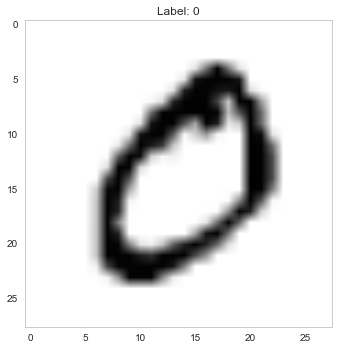

In [3]:
first_image = np.reshape(features.values[0],(28,28))
plt.imshow(first_image)
plt.title('Label: {}'.format(labels.values[0][0]))
plt.show()

In [4]:
print(first_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

## Dele i trening og testdata
Prediksjon med KNN tar lang tid hvis man har mye data. Dette skyldes at avstandene til punktene i treningssetrtet må regnes ut for alle nye punkter. Derfor velger vi å holde oss til de første 10000 bildene i datasettet. Treningssettet blir da på ca. 6666 punkter, og testsettet på 3333.

In [5]:
train_data, test_data,train_target,  test_target = train_test_split(features.values[:10000], labels[:10000].values, test_size=0.33, random_state=42)

## Vi trener en K nærmeste nabo-klassifikator

In [6]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(train_data,train_target.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

Når vi snakker om avstanden mellom to bilder (bilde A og bilde B), regner vi ut avstanden ved å ta hver av pikslene i A bildet og trekke fra verdien i de korresponderende pikslene til B. Deretter opphøyer vi alle disse forskjellene i 2. På denne måten vil alle forskjellene bli positive. Deretter summerer vi dem, og tar kvadratroten.



## Hva ble nøyaktigheten?

In [7]:
predictions = clf.predict(test_data)
print("Accuracy score: %f" %(predictions==test_target.ravel()).mean())

Accuracy score: 0.940303


Nøyaktigheten ble veldig bra, men det er selvsagt noen bilder som ble klassifisert feil. For å få en bedre innsikt i klassifikatoren, kan vi vise frem de bildene som ble feilklassifiserte. Vi ser på de første 10.

(197, 784)


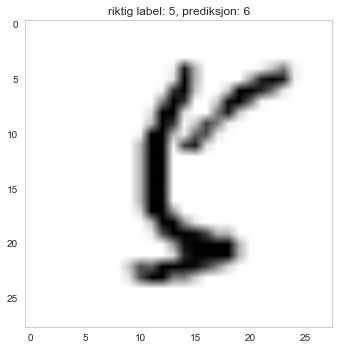

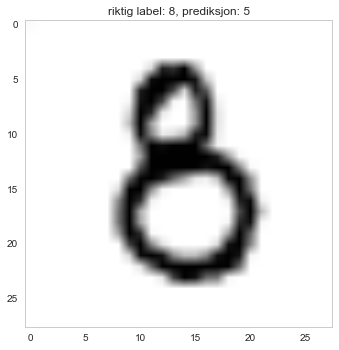

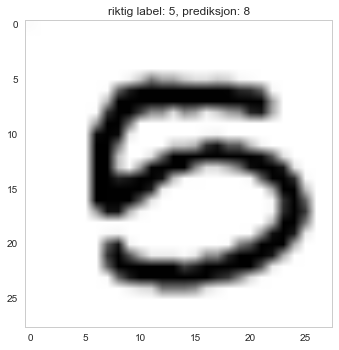

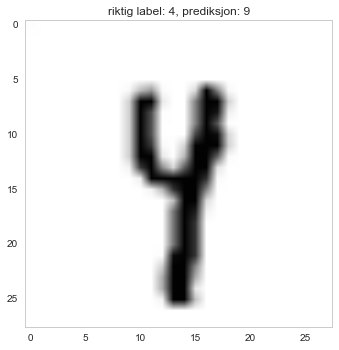

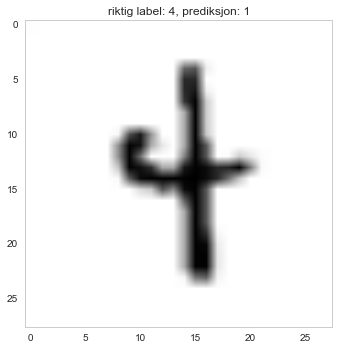

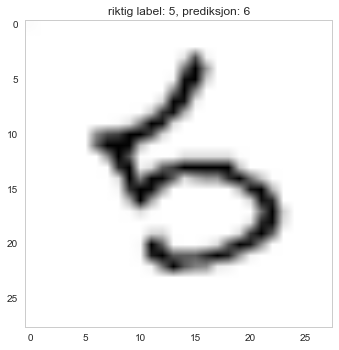

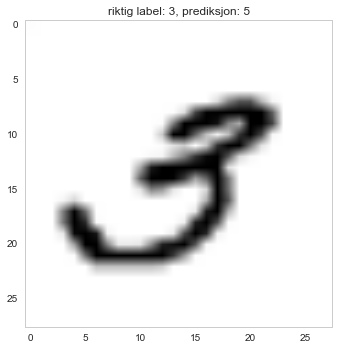

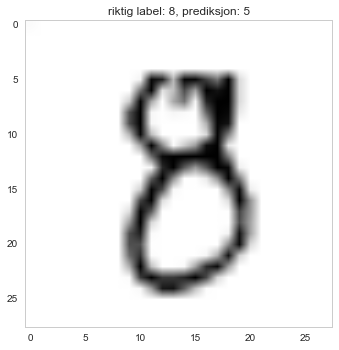

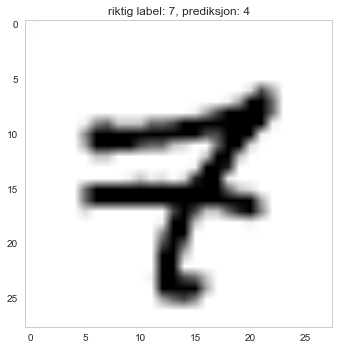

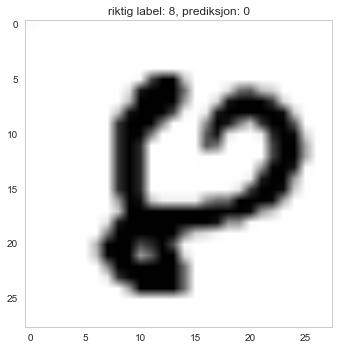

In [8]:
feil_klasse = predictions!=test_target.ravel()
feil_bilder = test_data[feil_klasse]

print(feil_bilder.shape)


for i,td in itertools.islice(enumerate(feil_bilder), 10):
    bilde = np.reshape(td,(28,28))
    plt.imshow(bilde)
    plt.title("riktig label: %d, prediksjon: %d" %(test_target[feil_klasse][i],predictions[feil_klasse][i]))
    
    plt.show()

**Oppgave 1:** Ta for deg noen av de feilklassifiserte bildene ovenfor, og forklar hvorfor du tror KNN har endt opp med det resultatet.

**Oppgave 2:** Alle bildene i MNIST-datasettet preprosessert slik at selve tallet er plassert inne i en 20x20 piksler stor boks i det 28x28 piksler store bildet. I tillegg er sifferet sentrert i bildet. Forklar hvorfor dette er lurt å gjøre. Særlig med tanke på klassifikasjon med KNN.

**Oppgave 3:** Lag noen egne bilder i f.eks. Microsoft Paint eller GIMP. Ta diskusjonen i forrige oppgave i betraktning når du tegner. Prøv ut forskjellige plasseringer og rotasjoner av sifrene, og kanskje også tykkelsen på streken. 

Hvilke tall er enkle å klassfisere rett? Hvilke er vanskelige? Hvorfor?

For å lese inn bildene dine i denne oppgaven kan du bruke funksjonen `read_image`, som er definert nedenfor. Den tar inn filnavnet, leser bildet inn som gråtoner og returnerer en 1 x `antall piksler`-array der hvert element korresponderer til en piksel i bildet. Dette gjøres for at vi skal kunne sende bildet til `predict`-metoden i modellen. Dersom bildet ikke er 28x28 piksler, vil funksjonen printe en advarsel.

Dersom du vil vise bildet må du derfor bruke `reshape`-metoden. For eksempel kan du gjøre slik:
```python
im = read_image('../bilde.png')
plt.imshow(im.reshape(28, 28))
plt.show()
```

In [9]:
def read_image(filename):
    im = 255-imread(filename, flatten=True)
    if im.shape != (28, 28):
        print('Advarsel: {} er ikke 28 x 28 piksler!'.format(filename))
    return im.reshape(1, -1)

(1, 784)


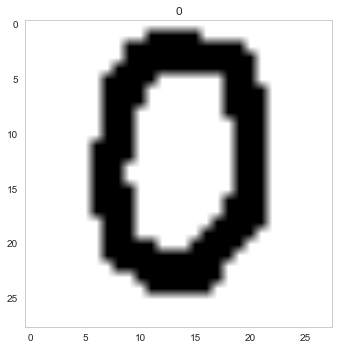

(1, 784)


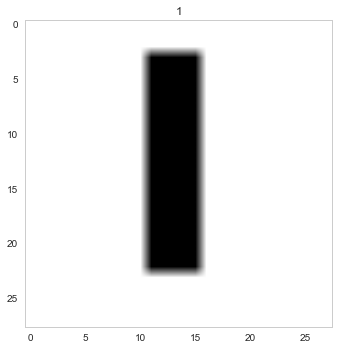

(1, 784)


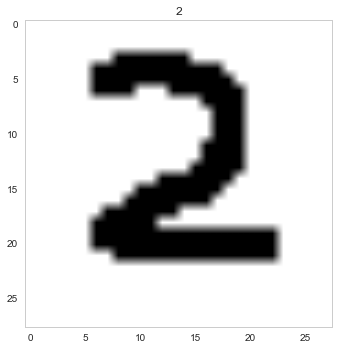

(1, 784)


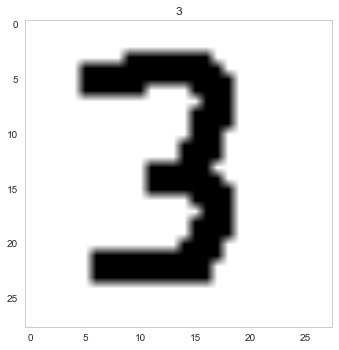

(1, 784)


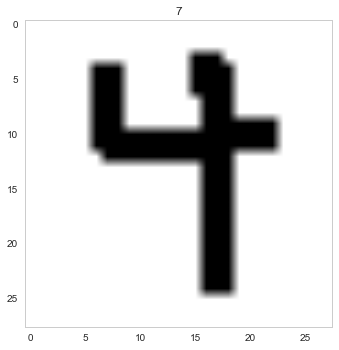

(1, 784)


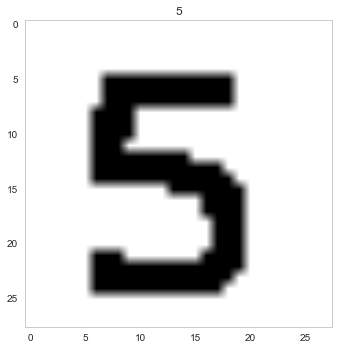

(1, 784)


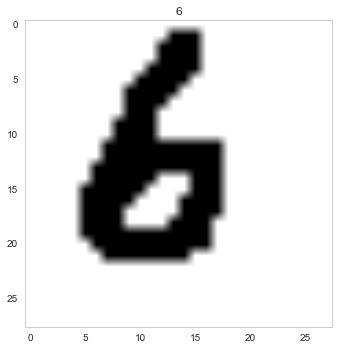

(1, 784)


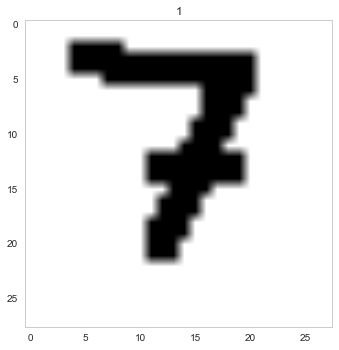

(1, 784)


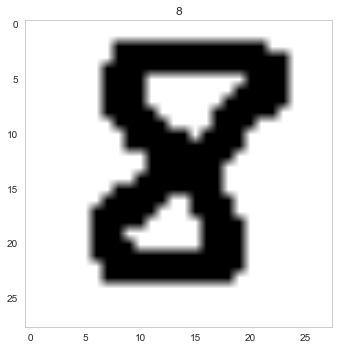

(1, 784)


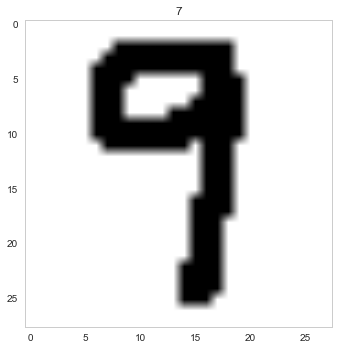

In [11]:

# "Løsning"/eksempel
for i in range(10):
    filename = '../datasets/mnist/new/{}.png'.format(i)
    im = read_image(filename)
    print(im.shape)
    pred = clf.predict(im)
    plt.imshow(im.reshape(28, 28))
    plt.title('{}'.format(pred[0]))
    plt.show()

In [19]:
data = pd.read_csv('../datasets/mnist/mnist_train.csv', header=-1)
data.columns = ['label'] + list(map(str, range(1, 785))) 

In [22]:
data.head()

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
labels = data[['label']]
features = data.drop(['label'], axis=1)

features